In [2]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
import pickle
import soundfile as sf

In [3]:
def __add_noise(tgt_wav, add_wav, db):
    tgt_rms = np.sqrt(np.mean(np.square(tgt_wav), axis=-1))
    add_rms = np.sqrt(np.mean(np.square(add_wav), axis=-1))

    noise_rms = tgt_rms / (10**(float(db) / 20)) 
    new_wav = tgt_wav + add_wav * (noise_rms / (add_rms + 1e-6))
    new_wav = np.clip(new_wav, np.min(new_wav)*2, np.max(new_wav)*2)
    return new_wav


In [4]:
def Mixaudio(audio_path1,audio_path2):
    # Load an audio file
    samples1, sample_rate = librosa.load(audio_path1,sr=32000)
    samples2, sample_rate = librosa.load(audio_path2,sr=32000)
    min_len = min(len(samples1),len(samples2))
    samples1 = samples1[:min_len]
    samples2 = samples2[:min_len]
    db = np.random.randint(-30,20)
    samples = __add_noise(samples1,samples2,db=db)

    # Visualize the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(samples, sr=sample_rate)
    plt.title('Waveform')

    # Compute the spectrogram
    spectrogram = librosa.stft(samples)
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))


    # Visualize the mel spectrogram
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate,fmin=40,fmax=14000)

    # Visualize mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=16000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()

    display(Audio(samples, rate=sample_rate))
    plt.show()

In [5]:
def audio_eda(audio_path):
   
    # Load an audio file
    samples, sample_rate = librosa.load(audio_path)
    # samples = samples[:10*sample_rate]
    # samples = np.roll(samples, np.random.randint(len(samples)//4, 3*len(samples)//4)) + samples
    # samples_ = samples.copy()
    # while len(samples_) < 10*sample_rate:
    #     samples_ = np.concatenate((samples_,samples))
    
    # samples = samples_[:10*sample_rate]
    # Visualize the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(samples, sr=sample_rate)
    plt.title('Waveform')

    # Compute the spectrogram
    spectrogram = librosa.stft(samples)

    # Visualize the spectrogram
    # plt.figure(figsize=(14, 5))
    # librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Spectrogram (dB)')

    # Compute the mel spectrogram


    # Visualize the mel spectrogram
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate,fmin=40,fmax=14000,win_length=1024,hop_length=512,n_mels=128)

    # Visualize mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=16000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    display(Audio(samples, rate=sample_rate))
    plt.show()

def audio_eda_delete_hv(audio_path):
   
    # Load an audio file
    ogg_name = audio_path.split('/')[-1]
    samples, sample_rate = sf.read(audio_path)
    with open('/root/projects/BirdClef2025/data/train_voice_data_numpy.pkl','rb') as f:
        hv_record = pickle.load(f)
    
    if ogg_name in hv_record:
        delete_index = hv_record[ogg_name]
        delete_index = delete_index[np.where(delete_index<len(samples))]
        samples = np.delete(samples,delete_index)
    # samples = samples[:10*sample_rate]

    # samples_ = samples.copy()
    # while len(samples_) < 10*sample_rate:
    #     samples_ = np.concatenate((samples_,samples))
    
    # samples = samples_[:10*sample_rate]
    # Visualize the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(samples, sr=sample_rate)
    plt.title('Waveform')

    # Visualize the spectrogram
    # plt.figure(figsize=(14, 5))
    # librosa.display.specshow(spectrogram_db, sr=sample_rate, x_axis='time', y_axis='log')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title('Spectrogram (dB)')

    # Compute the mel spectrogram


    # Visualize the mel spectrogram
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate,fmin=40,fmax=14000)

    # Visualize mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=16000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    display(Audio(samples, rate=sample_rate))
    plt.show()

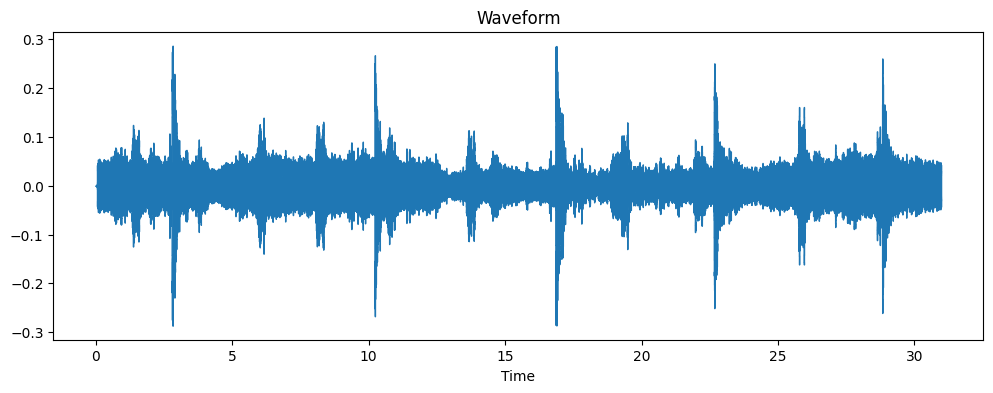

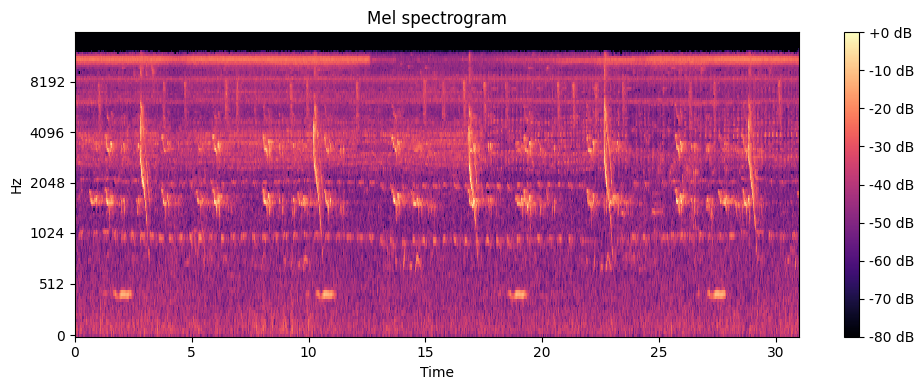

In [7]:
from glob import glob
import random
# path = '/root/projects/BirdClef2025/data/train_soundscapes_10s/H31_20230516_165000_30s.ogg'
path = '/root/projects/BirdClef2025/data/train_audio/cocwoo1/XC544058.ogg'
# index = df[df['path']==path][bird_cols].values.argmax()
# max_value = df[df['path']==path][bird_cols].values.max()
# print(bird_cols[index])
# print(max_value)
# root_path = '/root/projects/BirdClef2025/data/train_soundscapes'
# path = root_path+'/O203_20230521_100000.ogg'
audio_eda(path)
# path = glob('/root/projects/BirdClef2025/data/train_audio/pirfly1/*.ogg')
# path = random.sample(path,1)[0]
# audio_eda(path)
# audio_eda_delete_hv(path)
# Mixaudio(path,'/root/projects/BirdClef2025/data/train_soundscapes_10s/H26_20230518_095500_20s.ogg')
# audio_eda('/root/projects/BirdClef2025/BirdCLEF2023-30th-place-solution-master/test.ogg')

# speices = 'y00678'
# train_path = f'/root/projects/BirdClef2025/data/train_audio/{speices}/*.ogg'
# example_audio = glob(train_path)
# idx = np.random.randint(0,len(example_audio)-1)
# # # # idx = 1 
# audio_eda(example_audio[idx])
# # Mixaudio(path,example_audio[idx])
# print(path)


/root/anaconda3/envs/cibmtr/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


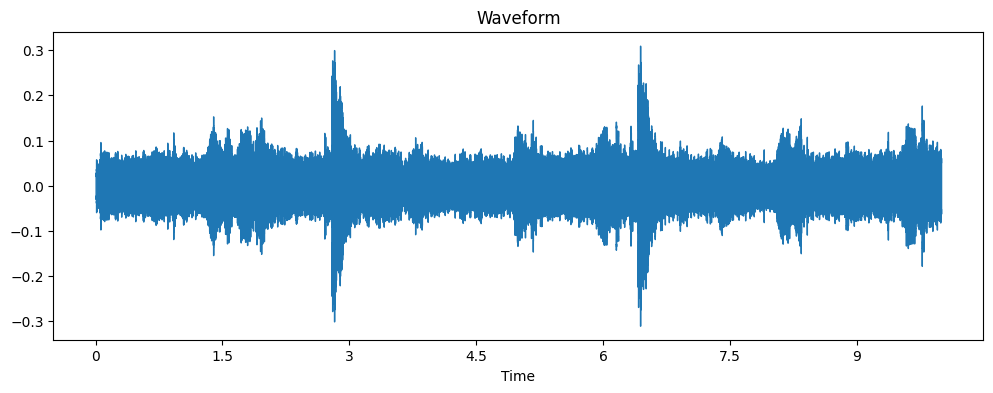

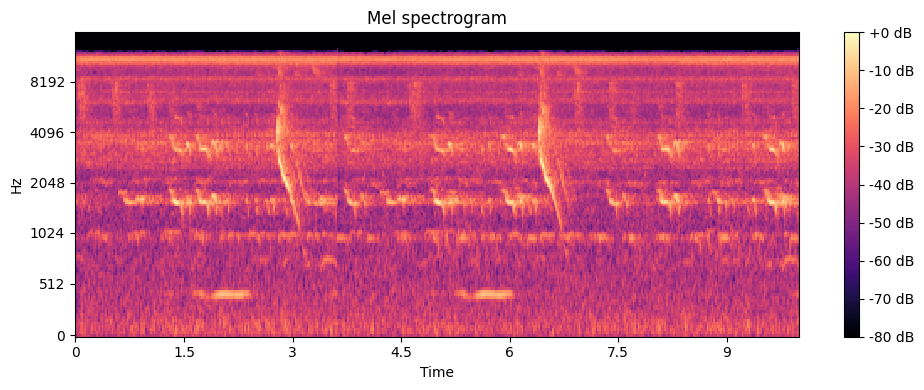

In [13]:
audio_eda(path)